In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('weight-height1.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df1=df.copy()
df2=df.copy()
df3=df.copy()

In [6]:
dummy=pd.get_dummies(df1['Gender'])

In [7]:
dummy1=pd.get_dummies(df1['Gender'],drop_first=True,prefix='Dummy')

In [9]:
df2.drop('Gender',axis='columns',inplace=True)

In [10]:
df3=pd.concat([df2,dummy1],axis=1)

<Figure size 6624x4464 with 0 Axes>

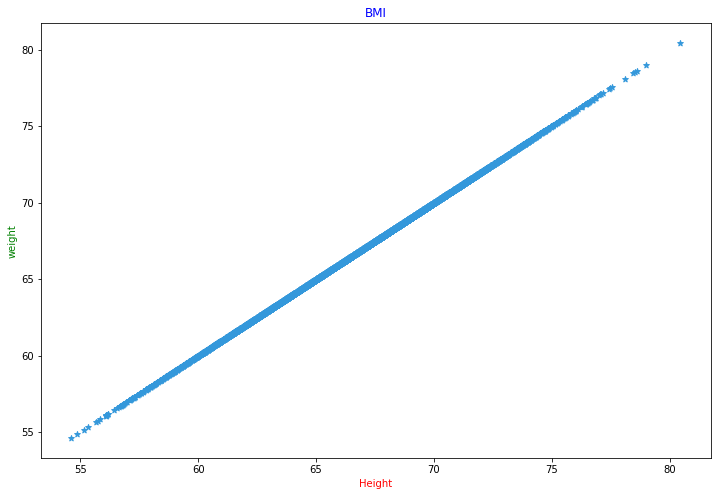

<Figure size 6624x4464 with 0 Axes>

In [28]:
plt.figure(figsize=(12,8))
plt.scatter(df3['Height'] , df3['Height'], color='#3498DB',marker='*')
plt.xlabel('Height',color='red')
plt.ylabel('weight',color='green')
plt.title('BMI', color='blue')
plt.figure(figsize=(92,62))

In [12]:
y=df3['Weight']
x=df3[['Dummy_Male','Height']]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30)

# Using K-NN Regressor

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
neigh=KNeighborsRegressor(n_neighbors=801)

In [19]:
neigh.fit(x,y)

KNeighborsRegressor(n_neighbors=801)

In [30]:
pred=neigh.predict(xtest)

In [31]:
df3.head()

,Height,Weight,Dummy_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [32]:
neigh.predict([[1,73.847017]])

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([210.75429446])

In [34]:
accuracy=210.75429446/241.893563

In [35]:
accuracy

0.8712687177211078

In [36]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [37]:
mse=mean_squared_error(ytest,pred)
mae=mean_absolute_error(ytest,pred)

In [38]:
mse

134.92091608361662

In [39]:
mae

9.033362432731675

In [74]:
import numpy as np

# HyperParameter Tuning for K-NN regressor

In [75]:
n_neighbors=[5,51,81,101,801]
weights=['uniform','distance']
algorithm=['auto','ball_tree','kd_tree','brute']
leaf_size=[30]
p=[2]
metric=['minkowski']
metric_params=[None]
n_jobs=[None]

In [53]:
grids={
    'n_neighbors':n_neighbors,
'weights':weights,
'algorithm':algorithm,
'leaf_size':leaf_size,
'p':p,
'metric':metric,
'metric_params':metric_params,
'n_jobs':n_jobs
}

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rando=RandomizedSearchCV(estimator=neigh,param_distributions=grids,n_iter=100)

In [56]:
rando

RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=801), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [5, 51, 81, 101, 801],
                                        'p': [2],
                                        'weights': ['uniform', 'distance']})

In [57]:
rando.fit(xtrain,ytrain)

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=801), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [5, 51, 81, 101, 801],
                                        'p': [2],
                                        'weights': ['uniform', 'distance']})

In [59]:
rando.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 51,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

# checking for performance

In [60]:
neigh_withHP=KNeighborsRegressor(n_neighbors=51)
neigh_withHP.fit(x,y)

KNeighborsRegressor(n_neighbors=51)

In [62]:
pred_withHP=neigh_withHP.predict(xtest)

In [64]:
neigh_withHP.predict([[1,73.847017]])

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([215.60193151])

In [66]:
accuracy_n= 215.60193151/241.893563
accuracy_n

0.8913090899818611

In [67]:
accuracy

0.8712687177211078

# after tuning 

In [69]:
mse_withHP=mean_squared_error(ytest,pred_withHP)
mae_withHP=mean_absolute_error(ytest,pred_withHP)
mse_withHP

108.16523087129936

In [70]:
mae_withHP

8.160230404535927

In [71]:
mse

134.92091608361662

In [72]:
mae

9.033362432731675

# after tuning accuracy increase mse improved from 135 to 108 and mae from 9 to 8

# ==============

# ============

# Using K-NN Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier
neigh_KNNClass= KNeighborsClassifier(n_neighbors=801)

In [81]:
x1=(df3[['Height','Weight']])
y1=(df3['Dummy_Male'])
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=.30)
neigh_KNNClass.fit(x1,y1)

KNeighborsClassifier(n_neighbors=801)

In [84]:
pred1=neigh_KNNClass.predict(x1test)
neigh_KNNClass.predict([[73.847017,241.893563]])

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

# Classification Report,Confusion Matrix, ROC,AUC and analysis

In [110]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve

In [111]:
print(classification_report(y1test,pred1))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1061
           1       0.91      0.92      0.91      1506

    accuracy                           0.90      2567
   macro avg       0.89      0.89      0.89      2567
weighted avg       0.90      0.90      0.90      2567



In [112]:
accuracy_score(y1test,pred1)

0.8967666536813401

In [113]:
confusion_matrix(y1test,pred1)

array([[ 917,  144],
       [ 121, 1385]], dtype=int64)

In [114]:
tp,fn,fp,tn=confusion_matrix(y1test,pred1).reshape(-1)

In [115]:
accuracy_knnclass=(tp+tn)/(tp+fp+tn+fn)

In [116]:
accuracy_knnclass

0.8967666536813401

In [117]:
ppv_n=tp/(tp+fn)
tpr_n=tp/(tp+fn)
fpr_n=fp/(fp+tn)
f1_measure_n=(ppv_n+tpr_n)/2
f1_score_n=(2*ppv_n*tpr_n)/(ppv_n+tpr_n)
tnr_n=tn/(tn+fp)
csi_n=tp/(tp+fn+fp)
fdr_n=fp/(tp+fp)

In [119]:
Accurcay_knnclass_t=(tp+tn)/(tp+fp+tn+fn)
Accurcay_knnclass_t

0.8967666536813401

In [120]:
#PositivePredictiveValue
ppv_n

0.8642789820923656

In [121]:
#truepositive rate
tpr_n

0.8642789820923656

In [123]:
#falsepositiv earte
fpr_n

0.08034528552456839

In [124]:
#f1 measure
f1_measure_n

0.8642789820923656

In [125]:
#harmonic mean,f1 score
f1_score_n

0.8642789820923656

In [126]:
#true negative rate
tnr_n

0.9196547144754316

In [127]:
#Critical Success Index
csi_n

0.7758037225042301

In [128]:
#Flase Discover Rate
fdr_n

0.11657032755298652

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC Curve')

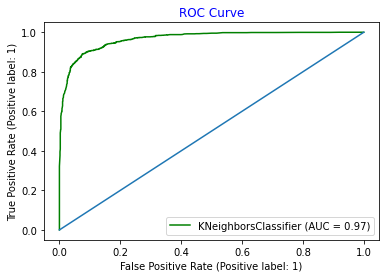

In [139]:
plot_roc_curve(neigh_KNNClass,x1test,y1test,color='Green')
plt.plot([0,1],[0,1])
plt.title('ROC Curve', color='blue')

# HyperParameter Tuning for K-NN Classifier

In [140]:
rando1=RandomizedSearchCV(estimator=neigh_KNNClass,param_distributions=grids,n_iter=100)

In [142]:
rando1.fit(x1train,y1train)

C:\Users\e.haque\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=KNeighborsClassifier(n_neighbors=801), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None],
                                        'n_jobs': [None],
                                        'n_neighbors': [5, 51, 81, 101, 801],
                                        'p': [2],
                                        'weights': ['uniform', 'distance']})

In [143]:
rando1.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 51,
 'n_jobs': None,
 'metric_params': None,
 'metric': 'minkowski',
 'leaf_size': 30,
 'algorithm': 'auto'}

# checking for performance

In [145]:
neigh_KNNClass_HP= KNeighborsClassifier(n_neighbors=51)
neigh_KNNClass_HP.fit(x1,y1)

KNeighborsClassifier(n_neighbors=51)

In [ ]:
KNN_Rsplit=np.random.randint(15,200,25)